In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import sys
import csv
import functools
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
df = pd.read_pickle("./3_COMB_File_CLEANED_1.pkl")
df.shape

(42208, 42)

<AxesSubplot:xlabel='RECALL_CLASS', ylabel='count'>

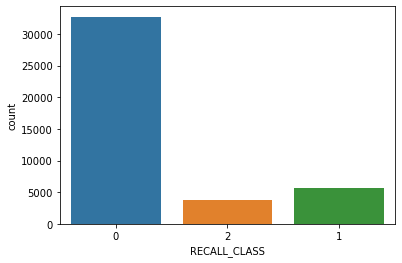

In [33]:
sns.countplot(x="RECALL_CLASS", data=df)

In [34]:
df_recall0 = df[df["RECALL_CLASS"] == "0"]
print(df_recall0.shape)
df_recall0.head()

(32724, 42)


,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,textLen,REPORT_NUMBER,REPORT_SOURCE_CODE,MANUFACTURER_LINK_FLAG_,...,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,year,STD_MANUFACTURER,STD_DEVICE,RECALL_CLASS,Before2013,CENSORED,_merge,CLEAN_FOI_TEXT
0,262717,162068,D,1,NaN,EVENT DESCRIPTION CPI RECEIVED INFORMATION THA...,NaN,2124215-2000-01321,M,Y,...,0 DAY,R,2000,BOSTON SCIENTIFIC,BOS_SCI_ENDOTAK,0,True,2000-02-09,both,mfgid receiv inform thi implant cardiovert def...
1,262790,161157,D,1,NaN,EVENT DESCRIPTION CPI RECEIVED INFORMATION THA...,NaN,2124215-2000-01260,M,Y,...,4 YR,Y,2000,BOSTON SCIENTIFIC,BOS_SCI_ENDOTAK_DSP,0,True,2000-02-09,both,mfgid receiv inform thi patient an devid trans...
2,262799,204642,D,1,NaN,EVENT DESCRIPTION GUIDANT/CRM RECEIVED INFORMA...,NaN,2124215-2000-01516,M,Y,...,0 DAY,R,2000,BOSTON SCIENTIFIC,BOS_SCI_SELUTE,0,True,2000-02-09,both,mfgid crm receiv inform thi implant lead float...
3,262812,175882,D,1,NaN,EVENT DESCRIPTION GUIDANT/CPI RECEIVED INFORMA...,NaN,2124215-2000-01503,M,Y,...,29 MO,R,2000,BOSTON SCIENTIFIC,BOS_SCI_SELUTE,0,True,2000-02-09,both,mfgid mfgid receiv inform due microperfor micr...
4,262819,175883,D,1,NaN,EVENT DESCRIPTION CPI RECEIVED INFORMATION THA...,NaN,2124215-2000-01510,M,Y,...,5 YR,Y,2000,BOSTON SCIENTIFIC,BOS_SCI_ENDOTAK,0,True,2000-02-09,both,mfgid receiv inform thi devid transven defibri...


In [35]:
df_recall1 = df[df["RECALL_CLASS"] == "1"]
print(df_recall1.shape)
df_recall1.head()

(5720, 42)


,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,textLen,REPORT_NUMBER,REPORT_SOURCE_CODE,MANUFACTURER_LINK_FLAG_,...,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,year,STD_MANUFACTURER,STD_DEVICE,RECALL_CLASS,Before2013,CENSORED,_merge,CLEAN_FOI_TEXT
1162,409748,290612,D,1,NaN,IT WAS REPORTED THAT 1 DAY POST-IMPLANT THE PA...,NaN,2938836-2002-00336,M,Y,...,NO INFO,R,2002,ST. JUDE,STJUDE_RIATA,1,True,2002-08-09,both,it report day postimpl patient receiv multipl ...
1181,426239,268707,D,1,NaN,IT WAS REPORTED TO ST. JUDE MEDICAL THAT 2 DAY...,NaN,2938836-2002-00457,M,Y,...,2 MO,Y,2002,ST. JUDE,STJUDE_RIATA,1,True,2002-11-04,both,it report mfgid medic day implant ventricular ...
1259,424242,250900,D,1,NaN,THE LEAD WAS EXPLANTED DUE TO A REPORTED CAPTU...,NaN,2938836-2002-00445,M,Y,...,2 MO,Y,2002,ST. JUDE,STJUDE_RIATA,1,True,2002-10-24,both,the lead explant due a report captur sens anomali
1260,426820,21587628,D,1,NaN,THE ST. JUDE REPRESENTATIVE REPORTED THAT THE ...,NaN,2938836-2002-00460,M,Y,...,6 MO,Y,2002,ST. JUDE,STJUDE_RIATA,1,True,2002-11-08,both,the mfgid repres report the patient receiv sev...
1261,431515,284917,D,1,NaN,NOISE WAS OBSERVED ON THE INTERNAL ELECTROGRAM...,NaN,2938836-2002-00500,M,Y,...,15 DAY,Y,2002,ST. JUDE,STJUDE_RIATA,1,True,2002-12-04,both,nois observ the intern electrogram lead reposi...


In [36]:
df_recall2 = df[df["RECALL_CLASS"] == "2"]
print(df_recall2.shape)
df_recall2.head()

(3764, 42)


,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,textLen,REPORT_NUMBER,REPORT_SOURCE_CODE,MANUFACTURER_LINK_FLAG_,...,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,year,STD_MANUFACTURER,STD_DEVICE,RECALL_CLASS,Before2013,CENSORED,_merge,CLEAN_FOI_TEXT
1154,407143,18604588,D,1,NaN,"NON-CAPTURE, SENSING DIFFICULTY.",NaN,2649622-2002-00449,M,Y,...,6 MO,Y,2002,MEDTRONIC,MEDTRONIC_SPRINT_QUATTRO_SECURE,2,True,2002-07-10,both,noncaptur sens difficulti
1159,407300,21594076,D,1,NaN,"HIGH PACING THRESHOLDS, NO CAPTURE, ""NICKS"" NO...",NaN,2649622-2002-00434,M,Y,...,5 MO,Y,2002,MEDTRONIC,MEDTRONIC_SPRINT_QUATTRO_SECURE,2,True,2002-07-10,both,high pace threshold captur nick note lead explant
1161,407347,259305,D,1,NaN,"SENSING DIFFICULTY, FLUID/BLOOD INGRESSION. 6...",NaN,2649622-2002-00421,M,Y,...,4 MO,Y,2002,MEDTRONIC,MEDTRONIC_SPRINT_QUATTRO_SECURE,2,True,2002-07-10,both,sens difficulti fluidblood ingress addtl info ...
1176,420206,259590,D,1,NaN,PT PRESENTED WITH CHEST PAIN AND PERFORATION W...,NaN,2649622-2002-00481,M,Y,...,3 MO,R,2002,MEDTRONIC,MEDTRONIC_SPRINT_QUATTRO_SECURE,2,True,2002-09-10,both,pt present chest pain perfor suspect
1241,407284,259293,D,1,NaN,POOR R-WAVE SENSING,NaN,2649622-2002-00438,M,Y,...,4 MO,Y,2002,MEDTRONIC,MEDTRONIC_SPRINT_QUATTRO_SECURE,2,True,2002-07-10,both,poor rwave sens


In [37]:
# undersampling
udf_recall0 = df_recall0.sample(n=3764)
print(udf_recall0.shape)
udf_recall1 = df_recall1.sample(n=3764)
print(udf_recall1.shape)
udf_recall2 = df_recall2
print(udf_recall2.shape)

(3764, 42)
(3764, 42)
(3764, 42)


(11292, 42)


<AxesSubplot:xlabel='RECALL_CLASS', ylabel='count'>

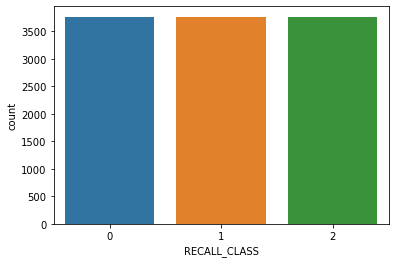

In [38]:
udf = udf_recall0
udf = udf.append(udf_recall1)
udf = udf.append(udf_recall2)
print(udf.shape)
sns.countplot(x="RECALL_CLASS", data=udf)

In [48]:
# oversampling
odf_recall0 = df_recall0
print(odf_recall0.shape)

odf2_recall1 = pd.concat([df_recall1]*2, ignore_index=True)
print(odf2_recall1.shape)
odf2_recall2 = pd.concat([df_recall2]*2, ignore_index=True)
print(odf2_recall2.shape)

odf3_recall1 = pd.concat([df_recall1]*3, ignore_index=True)
print(odf3_recall1.shape)
odf3_recall2 = pd.concat([df_recall2]*3, ignore_index=True)
print(odf3_recall2.shape)

odf4_recall1 = pd.concat([df_recall1]*4, ignore_index=True)
print(odf4_recall1.shape)
odf4_recall2 = pd.concat([df_recall2]*4, ignore_index=True)
print(odf4_recall2.shape)

odf5_recall1 = pd.concat([df_recall1]*5, ignore_index=True)
print(odf5_recall1.shape)
odf5_recall2 = pd.concat([df_recall2]*5, ignore_index=True)
print(odf5_recall2.shape)

odfsame_recall1 = pd.concat([df_recall1]*6, ignore_index=True)
odfsame_recall1 = odfsame_recall1.sample(n=32724)
print(odfsame_recall1.shape)
odfsame_recall2 = pd.concat([df_recall2]*9, ignore_index=True)
odfsame_recall2 = odfsame_recall2.sample(n=32724)
print(odfsame_recall2.shape)

(32724, 42)
(11440, 42)
(7528, 42)
(17160, 42)
(11292, 42)
(22880, 42)
(15056, 42)
(28600, 42)
(18820, 42)
(32724, 42)
(32724, 42)


(51692, 42)


<AxesSubplot:xlabel='RECALL_CLASS', ylabel='count'>

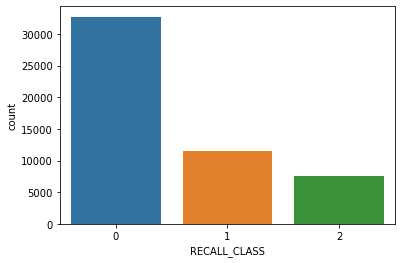

In [42]:
odf2 = odf_recall0
odf2 = odf2.append(odf2_recall1)
odf2 = odf2.append(odf2_recall2)
print(odf2.shape)
sns.countplot(x="RECALL_CLASS", data=odf2)

(61176, 42)


<AxesSubplot:xlabel='RECALL_CLASS', ylabel='count'>

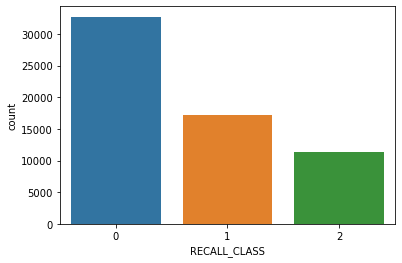

In [43]:
odf3 = odf_recall0
odf3 = odf3.append(odf3_recall1)
odf3 = odf3.append(odf3_recall2)
print(odf3.shape)
sns.countplot(x="RECALL_CLASS", data=odf3)

(70660, 42)


<AxesSubplot:xlabel='RECALL_CLASS', ylabel='count'>

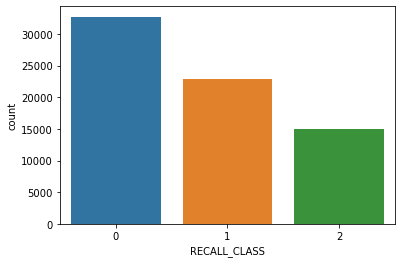

In [44]:
odf4 = odf_recall0
odf4 = odf4.append(odf4_recall1)
odf4 = odf4.append(odf4_recall2)
print(odf4.shape)
sns.countplot(x="RECALL_CLASS", data=odf4)

(80144, 42)


<AxesSubplot:xlabel='RECALL_CLASS', ylabel='count'>

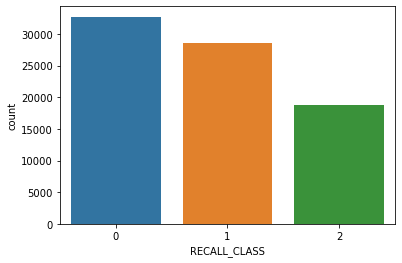

In [45]:
odf5 = odf_recall0
odf5 = odf5.append(odf5_recall1)
odf5 = odf5.append(odf5_recall2)
print(odf5.shape)
sns.countplot(x="RECALL_CLASS", data=odf5)

(98172, 42)


<AxesSubplot:xlabel='RECALL_CLASS', ylabel='count'>

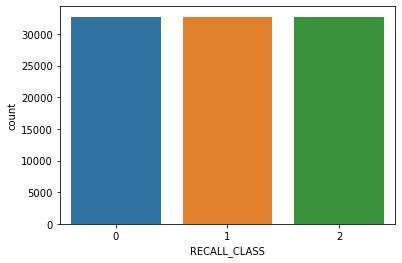

In [49]:
odfsame = odf_recall0
odfsame = odfsame.append(odfsame_recall1)
odfsame = odfsame.append(odfsame_recall2)
print(odfsame.shape)
sns.countplot(x="RECALL_CLASS", data=odfsame)

In [50]:
udf.to_pickle("./3_COMB_FILE_UNDERSAMPLING")
odf2.to_pickle("./3_COMB_FILE_OVERSAMPLINGx2")
odf3.to_pickle("./3_COMB_FILE_OVERSAMPLINGx3")
odf4.to_pickle("./3_COMB_FILE_OVERSAMPLINGx4")
odf5.to_pickle("./3_COMB_FILE_OVERSAMPLINGx5")
odfsame.to_pickle("./3_COMB_FILE_OVERSAMPLINGsame")